specifying Quantum Circuits

Preparing the Bell State

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


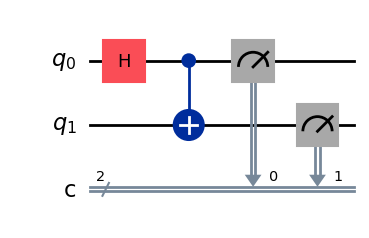

In [6]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2, 2)

circuit.h(0)

circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])

print(circuit)

circuit.draw("mpl")

Simulating Bells State using basic simulator

In [7]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # modern Aer simulator

# 1. Build the Bell state circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# 2. Choose simulator backend
sim = AerSimulator()

# 3. Run with 1024 shots
job = sim.run(qc, shots=1024)
result = job.result()

# 4. Get counts (measurement frequencies)
counts = result.get_counts()
print(counts)


{'00': 533, '11': 491}


preparing the GHZ State

In [2]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)

circuit.measure([0, 1, 2], [0, 1, 2])
print(circuit)

     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 


Generalized GHZ State

In [ ]:
from qiskit import QuantumCircuit

def generalized_GHZ_state(n):
    circuit = QuantumCircuit(n, n)

    # Apply the Hadamard gate at qubit 0
    circuit.h(0)
    circuit.barrier() # draw a barrier

    # Apply CNOT Gates
    for i in range (n - 1):
        circuit.cx(i, i + 1)
    
    circuit.barrier() # draw a barrier
    measured_qubits = [i for i in range (n)]
    classical_results = [ i for i in range (n)]
    circuit.measure(measured_qubits, classical_results)
    return circuit

n = 4
circuit = generalized_GHZ_state(n)
print(circuit)

     ┌───┐ ░                 ░ ┌─┐         
q_0: ┤ H ├─░───■─────────────░─┤M├─────────
     └───┘ ░ ┌─┴─┐           ░ └╥┘┌─┐      
q_1: ──────░─┤ X ├──■────────░──╫─┤M├──────
           ░ └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
q_2: ──────░──────┤ X ├──■───░──╫──╫─┤M├───
           ░      └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫──╫──╫─┤M├
           ░           └───┘ ░  ║  ║  ║ └╥┘
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


Basic simulation

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator

# Defines the backend and runs the simulation
backend = BasicSimulator()
n_shots = 1024 # Default number of shots is 1024
result = backend.run(circuit, shots = n_shots).result()

# Extract counts and probability distribution
counts = result.get_counts()
prob = {key:value/n_shots for key, value in counts.items()}
print("counts: ", counts)
print("Probabilities: " , prob)

counts:  {'0000': 502, '1111': 522}
Probabilities:  {'0000': 0.490234375, '1111': 0.509765625}


Using Aer

In [8]:
from qiskit import transpile
from qiskit_aer import AerSimulator

backend = AerSimulator()

compiled_circuit = transpile(circuit, backend)

n_shots = 1024
job_sim = backend.run(compiled_circuit, shots = n_shots)

result_sim = job_sim.result()
counts = result_sim.get_counts(compiled_circuit)
probs = {key:value/n_shots for key, value in counts.items()}

print (" Counts ", counts )
print (" Probabilities :", probs )

 Counts  {'11': 511, '00': 513}
 Probabilities : {'11': 0.4990234375, '00': 0.5009765625}


Using IBM Quantum Hardware

In [12]:
# SETTING UP THE SERVICE
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

from dotenv import load_dotenv
import os

load_dotenv()

token = os.getenv("IBM_QUANTUM_TOKEN")

service = QiskitRuntimeService(
    channel="ibm_quantum_platform",
    token = token
)

backend = service.backend("ibm_fez")


#SETTING UP THE BACKEND
#backend = service . backend (" ibm_torino ")


#TRANSPILING
# Transpile the circuit
transpiled_circuit = transpile(circuit, backend)
# print ( transpiled_circuit )


#SAMPLING AND EXTRACTING RESULTS
# Sample
Sampler = Sampler(mode=backend)
n_shots = 1024
Sampler.options.default_shots = n_shots
result = Sampler.run([transpiled_circuit]).result()

counts = result[0].data.c.get_counts()
probs = {key:value/n_shots for key, value in counts.items()}

print("Counts: ", counts)
print("Probs: ", probs)

qiskit_runtime_service._discover_account:WARNING:2025-11-28 17:29:58,830: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2025-11-28 17:30:02,259: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: lab0. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-28 17:30:02,261: Using instance: lab0, plan: open


Counts:  {'00': 491, '11': 507, '10': 9, '01': 17}
Probs:  {'00': 0.4794921875, '11': 0.4951171875, '10': 0.0087890625, '01': 0.0166015625}
